#  **<font color='dark gary'> Anomaly detection method**
https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection
<img src = 'https://images.unsplash.com/photo-1707581796350-260c9d2351d4?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8b3V0bGllcnxlbnwwfHwwfHx8MA%3D%3D'>


### 1. Supervised learning
### 2. Semi-Supervised learning (Novelty detection)
- 새로운 한번도 보지 못한 데이터가 outlier인지 아닌지 판단(훈련데이터에 outlier가 없음)
### 3. Unsupervised learning (Outlier detection)
- inlier와 outlier를 포함한 훈련데이터에서 outliers를 탐색
        * Anomaly는 outlier와 novelty를 모두 호칭

https://github.com/yzhao062/anomaly-detection-resources
- 응용 분야
     * Data cleaning
     * Fraud detection like credit card frauds or security breaches
     * Health monitoring of people, systems, and machines

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# <font color='red'> **1. Supervised Learning**

In [ ]:
! curl -o Boston.csv https://raw.githubusercontent.com/intro-stat-learning/ISLP/main/ISLP/data/Boston.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31378  100 31378    0     0   188k      0 --:--:-- --:--:-- --:--:--  189k


In [ ]:
boston = pd.read_csv('/content/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## 1.1 Interquartile Range(IQR) - Box plot으로 outlier 탐색
단일 변수의 백분위수 (range)를 확인하여 이상치(outlier)를 그려보고 확인한다

In [ ]:
boston.skew().sort_values(ascending=False)
boston.kurt().sort_values(ascending=False)

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
dtype: float64

crim       37.130509
chas        9.638264
zn          4.031510
rm          1.891500
medv        1.495197
lstat       0.493240
dis         0.487941
nox        -0.064667
ptratio    -0.285091
rad        -0.867232
age        -0.967716
tax        -1.142408
indus      -1.233540
dtype: float64

In [ ]:
boston.skew().sort_values(ascending=False).index[:3]

Index(['crim', 'chas', 'zn'], dtype='object')

<Axes: >

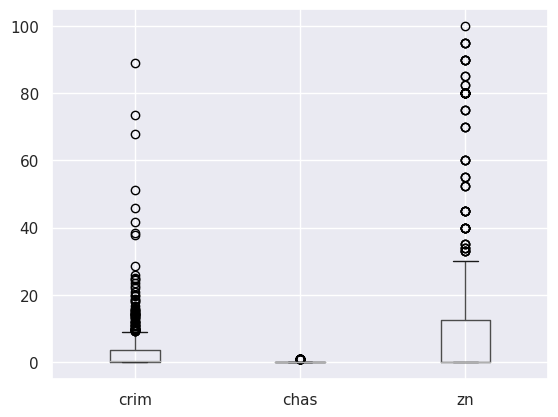

In [ ]:
cols = list(boston.skew().sort_values(ascending=False).index)[:3]
boston.boxplot(column=cols)

In [ ]:
def Outliers(col):
    q1, q3 =col.quantile(0.15), col.quantile(0.95)
    iqr = q3 - q1
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
    outliers = col[(col < l_fence) | (col > u_fence)]
    if outliers.count() > 0 :
        print(col.name,'의 총 이상치 관측 수:', outliers.count())
        print('Lower fence: ', l_fence, 'Upper fence: ', u_fence) #filtering = col.drop(outliers.index, axis = 0)
for col in boston.columns:
    Outliers(boston[col])

crim 의 총 이상치 관측 수: 6
Lower fence:  -23.5568 Upper fence:  39.39672


## 1.2 통계적 접근 방식 - 확률밀도함수로 이상치 확인

단일변수의 확률밀도 함수를 확인하여 이상치를 p-value로 확인한다

z = 1.96의 pdf: 0.942, z = 2.58의 pdf: 0.986


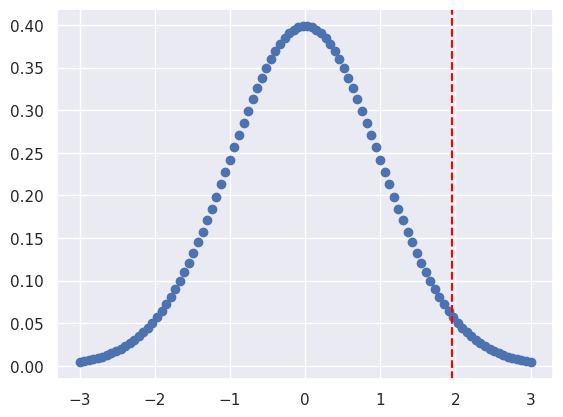

In [ ]:
import scipy as sp
sp.stats.norm(loc=0, scale=1) # 평균0, 표준편차 1
rv = sp.stats.norm(loc=0, scale=1)
print(f'z = 1.96의 pdf: {1- rv.pdf(1.96):.3f}, z = 2.58의 pdf: {1- rv.pdf(2.58):.3f}')
plt.scatter(np.linspace(-3,3,100), rv.pdf(np.linspace(-3,3,100)))
plt.axvline(x=1.96, color='red', linestyle='--')

Text(0.5, 0, 'instances')

Text(0, 0.5, 'z_value')

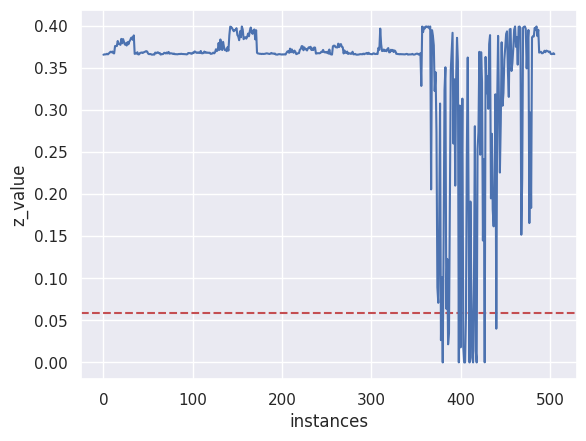

In [ ]:
z = (boston['crim'] - boston['crim'].mean())/boston['crim'].std()
plt.axhline(y= rv.pdf(1.96), color='r', linestyle='--')
plt.plot(rv.pdf(z))
plt.xlabel('instances'); plt.ylabel('z_value')

가우시안 분포를 가정하여 pdf(probability density distribution)이 임계치를 넘으면 이상치라고 판단

In [ ]:
for col in boston.columns:
    boston[col] = (boston[col] -boston[col].mean())/boston[col].std()
    boston[col + '_pdf'] = rv.pdf(boston[col])

boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,chas_pdf,nox_pdf,rm_pdf,age_pdf,dis_pdf,rad_pdf,tax_pdf,ptratio_pdf,lstat_pdf,medv_pdf
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,...,0.38442,0.394823,0.366289,0.396085,0.395048,0.246357,0.319601,0.137907,0.223977,0.393898
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,...,0.38442,0.303495,0.391499,0.372987,0.341692,0.273951,0.245273,0.381067,0.353473,0.396896
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,...,0.38442,0.303495,0.175522,0.385121,0.341692,0.273951,0.245273,0.381067,0.192433,0.166290
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,...,0.38442,0.281648,0.238269,0.287581,0.223454,0.300645,0.216649,0.396407,0.158188,0.198490
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,...,0.38442,0.281648,0.187843,0.350171,0.223454,0.300645,0.216649,0.396407,0.235805,0.132247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,...,0.38442,0.393996,0.362313,0.398873,0.328125,0.246357,0.289131,0.199966,0.365610,0.398901
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,...,0.38442,0.393996,0.388139,0.382664,0.308752,0.246357,0.289131,0.199966,0.352003,0.390229
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,...,0.38442,0.393996,0.245845,0.290465,0.295928,0.246357,0.289131,0.199966,0.246307,0.394559
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,...,0.38442,0.393996,0.306751,0.304226,0.319212,0.246357,0.289131,0.199966,0.274564,0.398273


In [ ]:
pdf = boston.columns[boston.columns.str.contains('_pdf')]
pdf

Index(['crim_pdf', 'zn_pdf', 'indus_pdf', 'chas_pdf', 'nox_pdf', 'rm_pdf',
       'age_pdf', 'dis_pdf', 'rad_pdf', 'tax_pdf', 'ptratio_pdf', 'lstat_pdf',
       'medv_pdf'],
      dtype='object')

<Axes: >

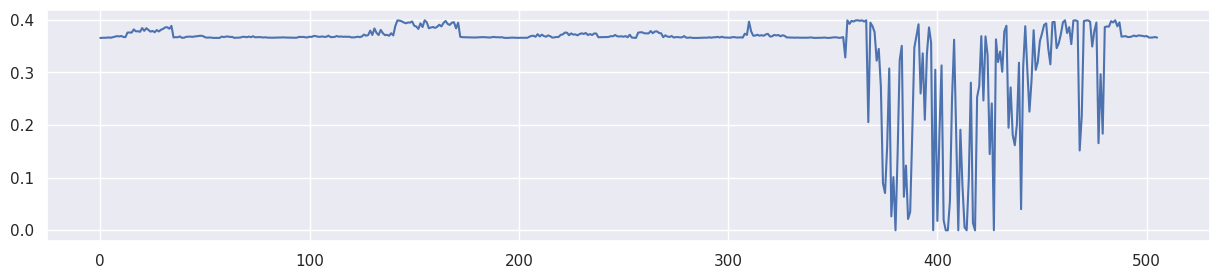

<Axes: >

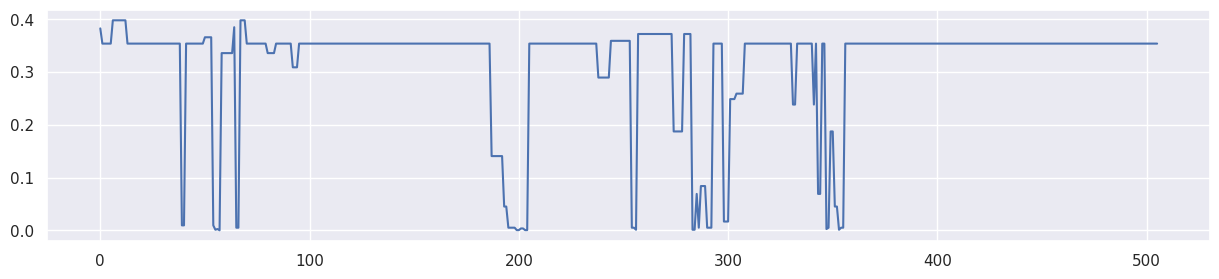

<Axes: >

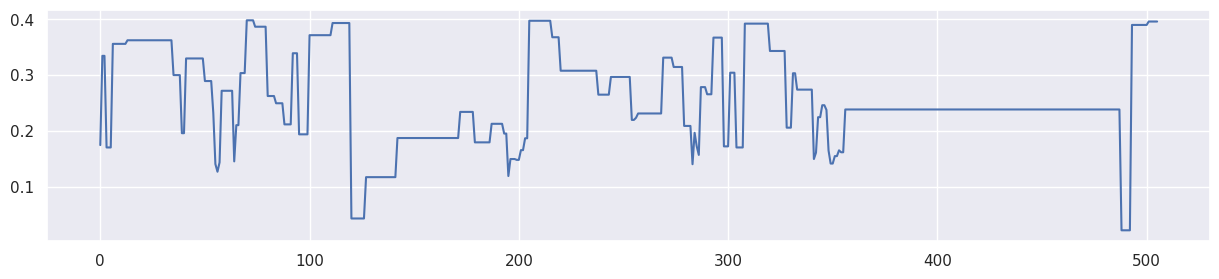

<Axes: >

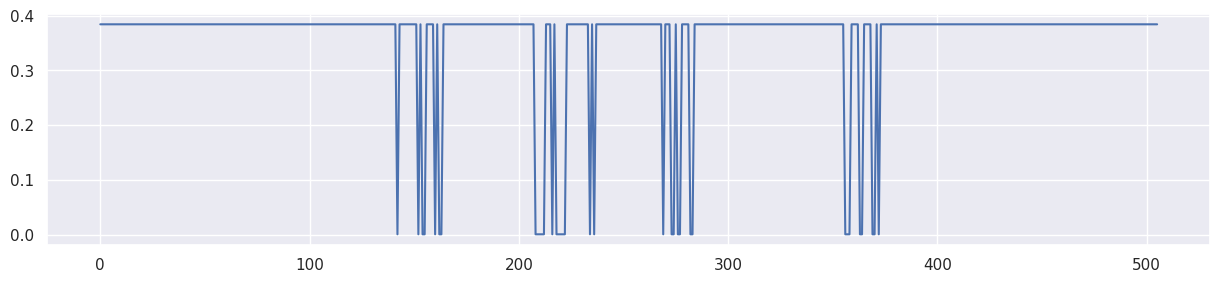

<Axes: >

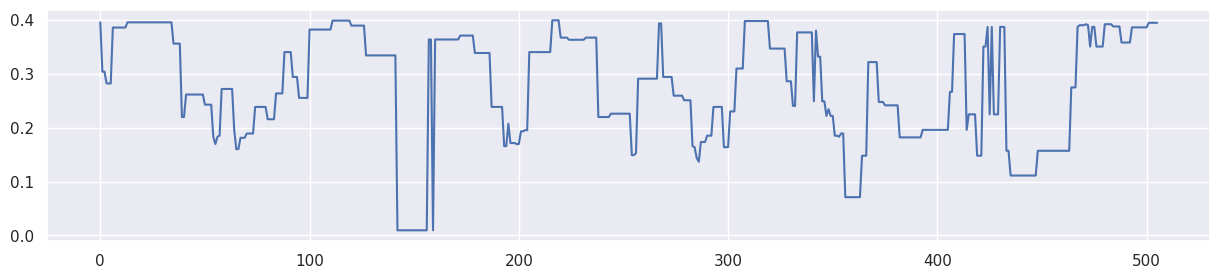

<Axes: >

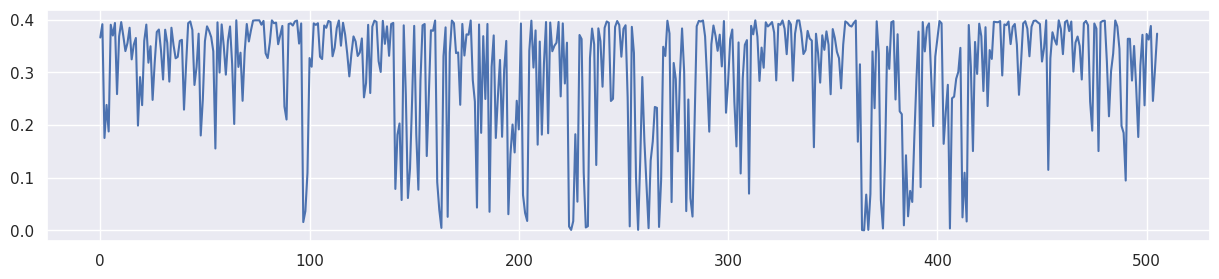

<Axes: >

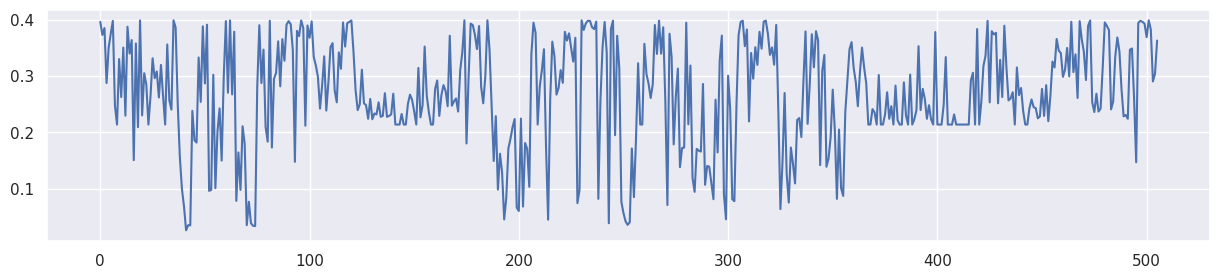

<Axes: >

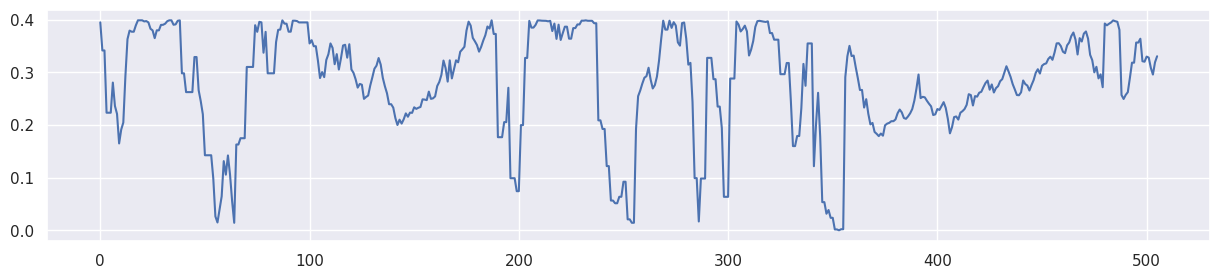

<Axes: >

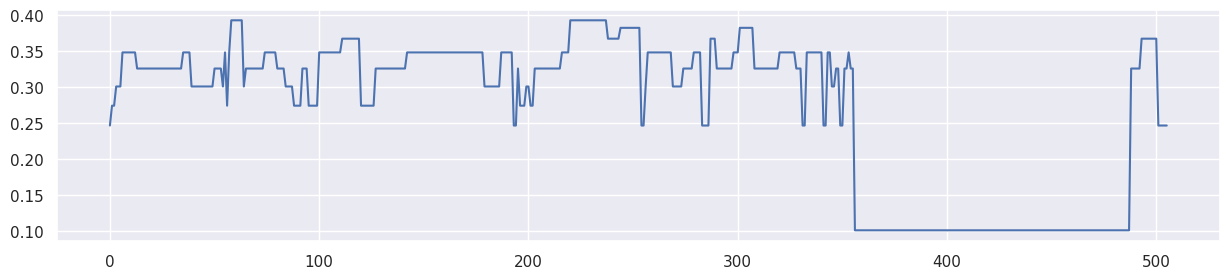

<Axes: >

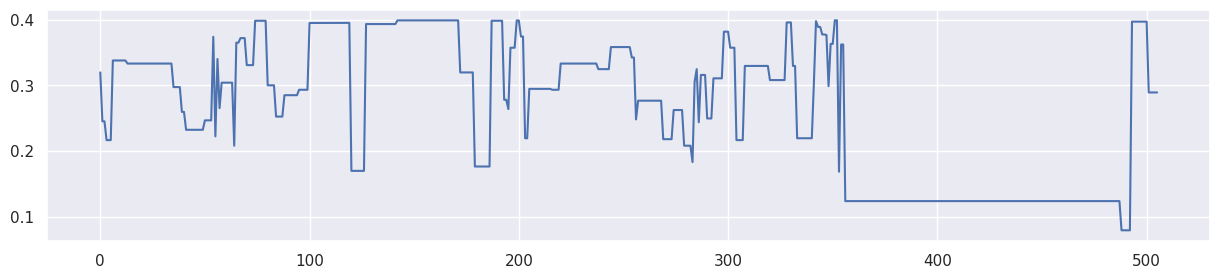

<Axes: >

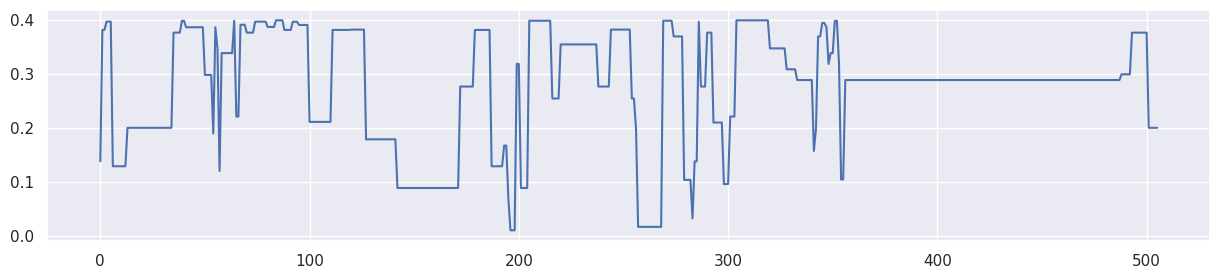

<Axes: >

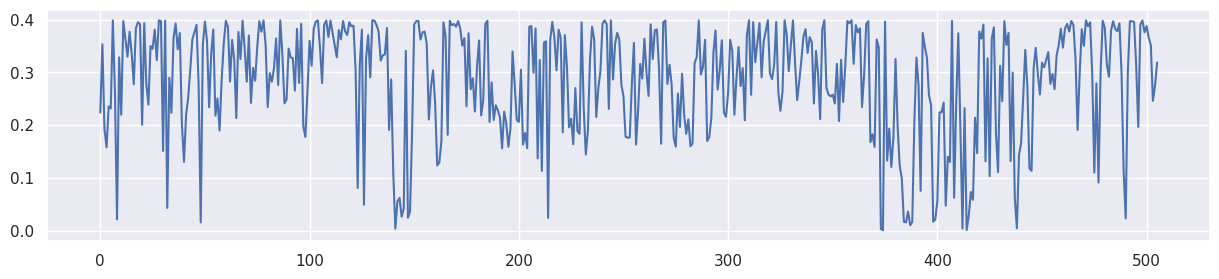

<Axes: >

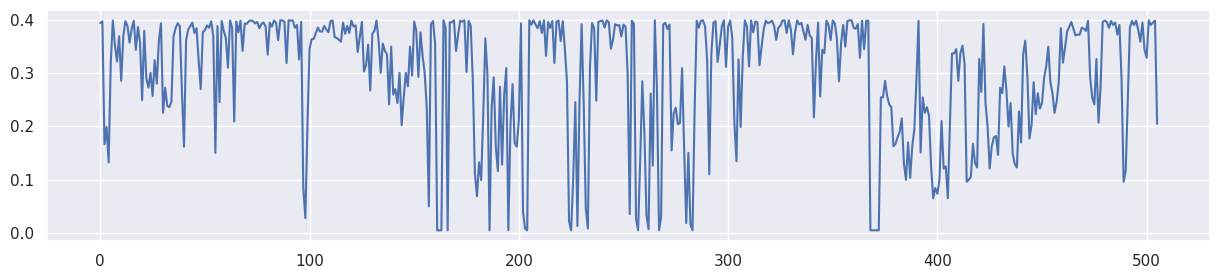

In [ ]:
for col in pdf:
    data = boston.loc[:, col]
    data.plot(figsize=(15,3))
    plt.show()

### **주가의 Boland 방법은 보통의 경우, 시계열 데이터의 트렌드와 변동성을 분석하여 이상치를 감지**
- **이동평균값을 기준으로 표준편차를 기준으로**

In [ ]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the data
start_date = '2019-01-01'
end_date = '2023-12-31'

# Fetch the data using yfinance
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793774,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029247,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481926,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402954,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077839,164101200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [ ]:
# Boland 방식 적용

def boland_outliers(series, threshold=2.5):
    # 1. 이동 평균 계산
    rolling_mean = series.rolling(window=20).mean()

    # 2. 이동 표준편차 계산
    rolling_std = series.rolling(window=20).std()

    # 3. 이상치 탐지
    z_score = (series - rolling_mean) / rolling_std
    outliers = np.abs(z_score) > threshold

    return outliers

# 이상치 탐지
outliers = boland_outliers(aapl['Close'])

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Closing Price')

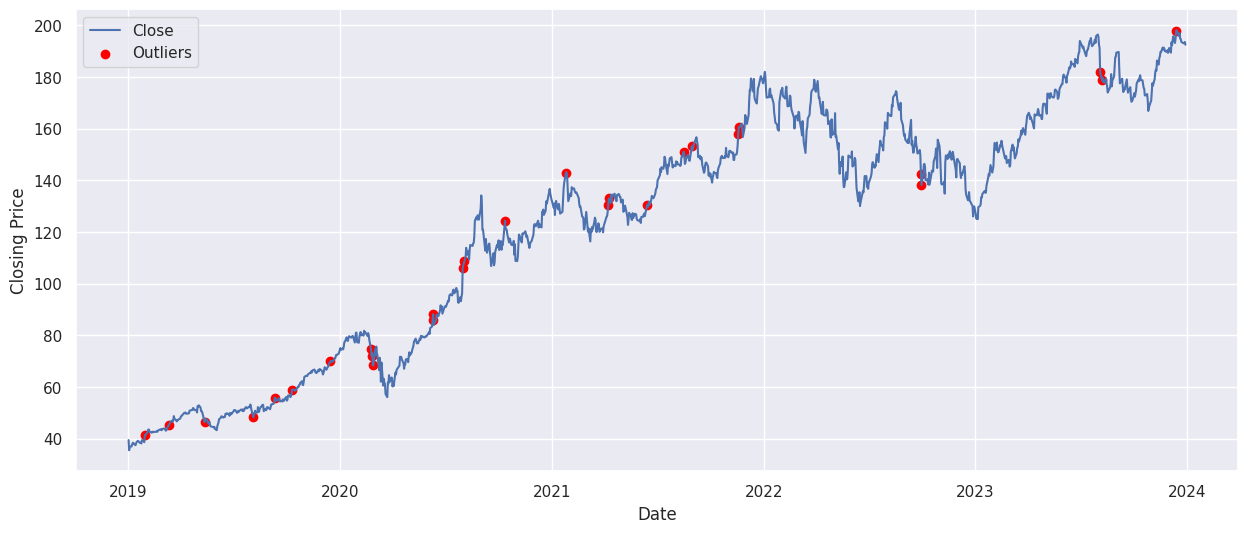

In [ ]:
# prompt: aapl['Close']와 outliers를 시각화하기
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the closing prices
ax.plot(aapl['Close'], label='Close')

# Plot the outliers
ax.scatter(aapl.index[outliers], aapl['Close'][outliers], color='red', label='Outliers')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()

# Show the plot
plt.show()

# <font color='red'> **2. Unsupervised Learning**

## 1.3 K-Nearest neighbors 이상치 확인
- Unsupervised K-Nearest Neighbors
- https://scikit-learn.org/stable/modules/neighbors.html
- SVM도 SVM hyperplane에서 거리를 기준으로 이상치 확인 가능

In [ ]:
boston = boston.drop(columns=pdf)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,-1.025487,1.486032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,-0.417734,-0.014440
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,-0.500355,-0.210154
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,-0.982076,0.148655
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,-0.864446,-0.057932


In [ ]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

NearestNeighbors(n_neighbors=3)

<Axes: >

Text(0.5, 1.0, 'Distance mean of KNN')

Text(0.5, 0, 'Instances')

Text(0, 0.5, 'Mean of Distance')

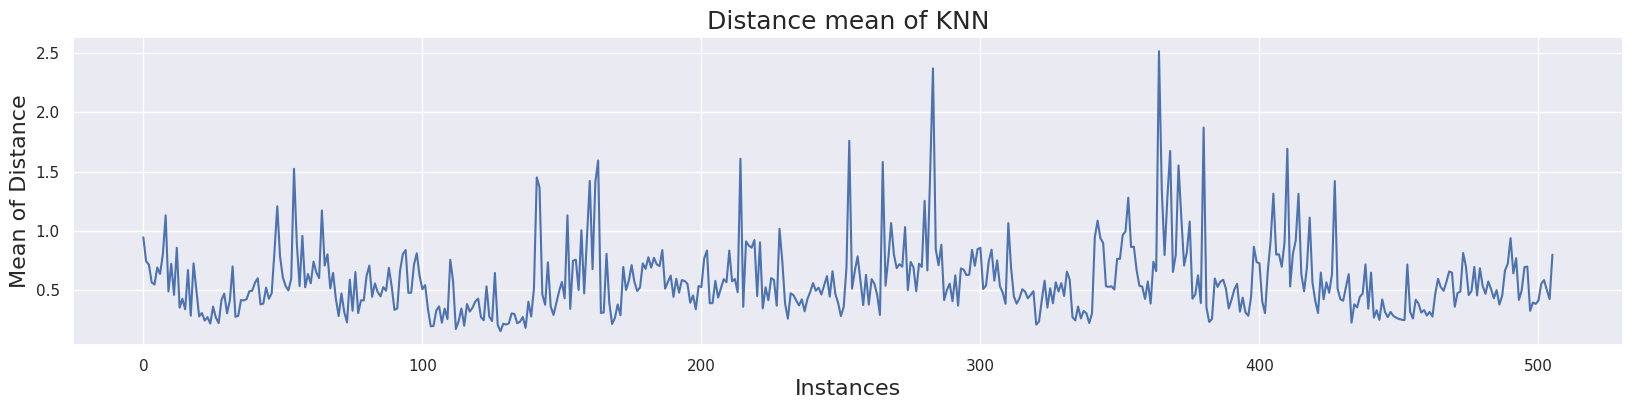

In [ ]:
from sklearn.neighbors import NearestNeighbors


nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(boston)
distances, indices = nbrs.kneighbors(boston) # distances : distances between data points
                                           # indices : associated index values
pd.Series(distances.mean(axis =1)).plot(figsize=(20,4))
plt.title('Distance mean of KNN', fontsize = 18)
plt.xlabel('Instances', fontsize = 16); plt.ylabel('Mean of Distance', fontsize = 16)

### Spike 되는 instance는 anomaly이며, 평균 거리가 '1.5'이상이면 이상치라고 판단

In [ ]:
outlier_index = np.where(distances.mean(axis = 1) > 1.5)
boston.iloc[outlier_index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
54,-0.418521,2.728545,-1.040293,-0.272329,-1.248688,-0.564510,-0.745142,1.673857,-0.752178,0.360531,1.221493,0.300647,-0.394995
163,-0.243503,-0.487240,1.230727,3.664771,0.434121,2.975113,0.899685,-0.775531,-0.522484,-0.031074,-1.734701,-1.306957,2.986505
214,-0.386439,-0.487240,-0.079701,-0.272329,-0.566935,-1.241977,-2.088003,-0.098562,-0.637331,-0.778684,0.066730,2.366166,0.126909
253,-0.377209,0.456057,-0.769170,-0.272329,-1.067462,2.810016,-2.137738,2.427522,-0.292791,-0.464213,0.297683,-1.276150,2.203649
265,-0.331557,0.370303,-1.044666,-0.272329,0.796572,-1.031336,-0.205156,-0.858875,-0.522484,-0.855818,-2.519940,-0.308506,0.029052
283,-0.418357,3.371702,-1.446978,3.664771,-1.326356,2.331804,-1.555122,0.992519,-0.981871,-1.247423,-2.242797,-1.329363,2.986505
364,-0.016188,-0.487240,1.014995,3.664771,1.409287,3.551530,0.508905,-0.897722,1.659603,1.529413,0.805778,-1.031088,-0.068805
368,0.149356,-0.487240,1.014995,-0.272329,0.658496,-1.871054,1.116390,-1.169459,1.659603,1.529413,0.805778,-1.315360,2.986505
371,0.653229,-0.487240,1.014995,-0.272329,0.658496,-0.097684,1.116390,-1.247058,1.659603,1.529413,0.805778,-0.437339,2.986505
380,9.924110,-0.487240,1.014995,-0.272329,1.003687,0.972600,0.828634,-1.129568,1.659603,1.529413,0.805778,0.638132,-1.319199


### 불균형데이터 유형
- 이상치는 극히 심한 불균형데이터와 같은 유형을 갖는다.
- make_classification() 함수에 클라스를 무작위로 교환하여 분류를 어렵게 함, flip_y=0

### 단변량으로 시각화하면 이상치를 발견하기 어려움

<Figure size 2000x500 with 0 Axes>

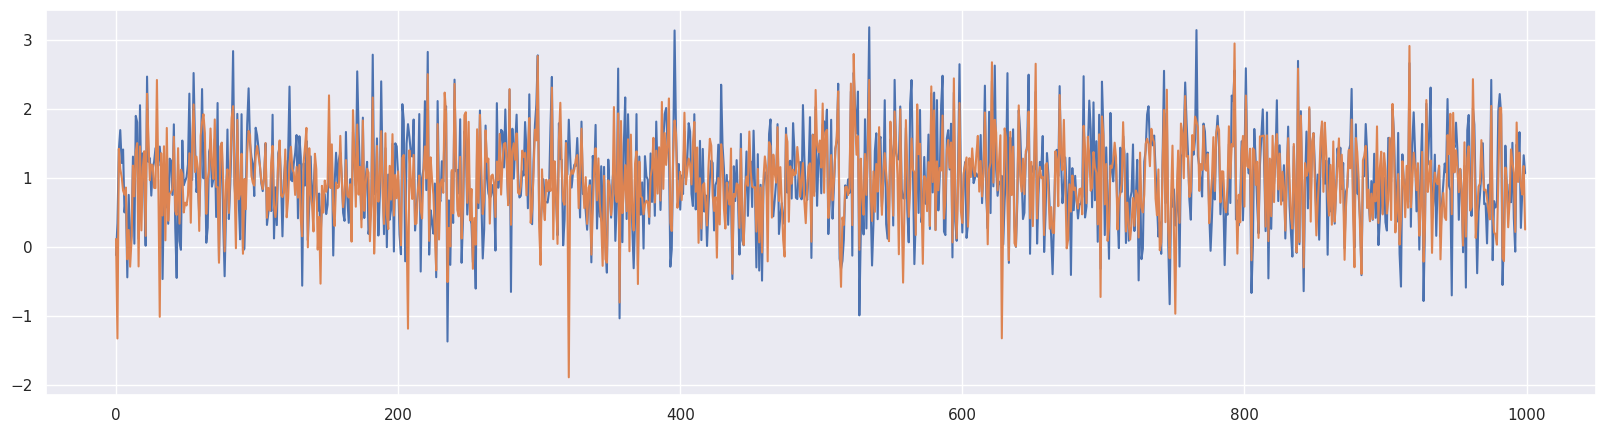

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
plt.figure(figsize=(20,5))
plt.plot(X[:, 0]); plt.plot(X[:, 1])

### 다변량, combination으로 시각화하면 이상치를 발견할 수있음

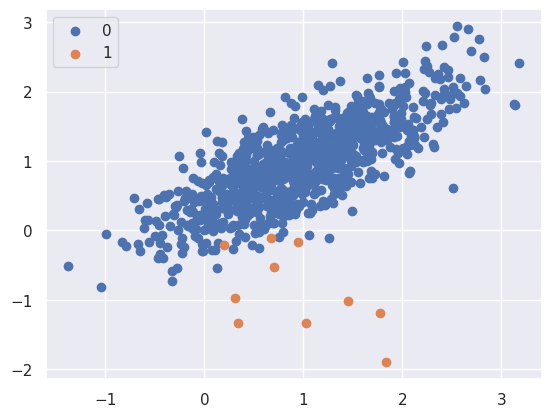

In [ ]:
from collections import Counter
for label, _ in Counter(y).items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()

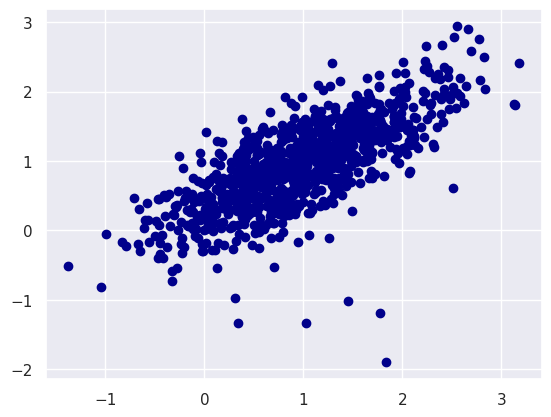

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='darkblue')
plt.show()

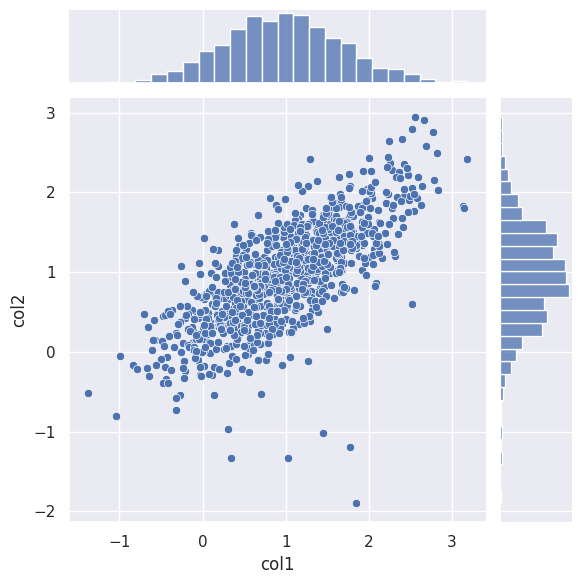

In [ ]:
data= pd.DataFrame(X, columns=['col1', 'col2'])
sns.jointplot(data=data, x='col1', y='col2')

## **예제**

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'col1')

Text(0, 0.5, 'col2')

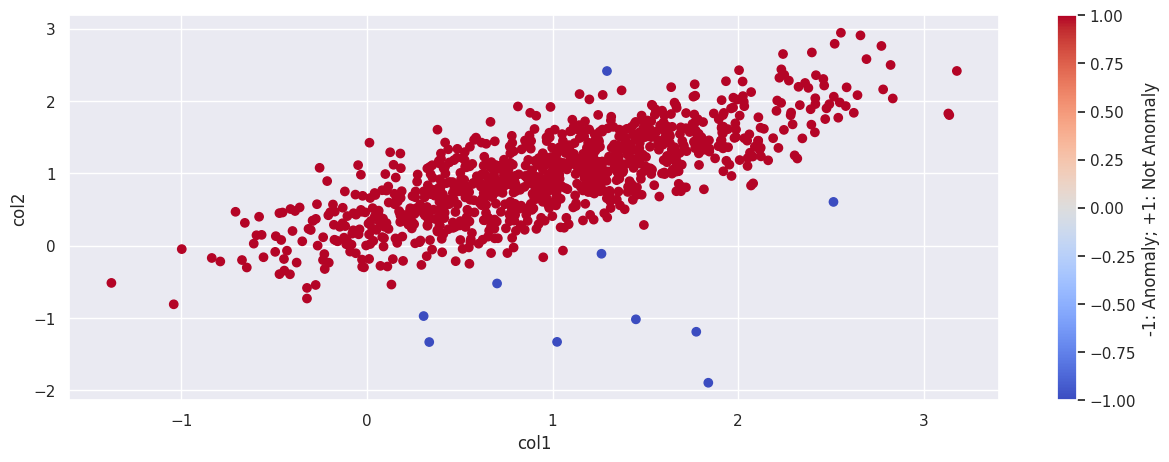

In [ ]:
from sklearn.covariance import EllipticEnvelope
data= pd.DataFrame(X, columns=['col1', 'col2'])
el = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None,
                      contamination=0.01, random_state=0)

data['Anomaly or Not'] = el.fit(data).predict(data)
plt.figure(figsize = (15, 5))
ax = plt.scatter(data['col1'], data['col2'], c = data['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('col1'); plt.ylabel('col2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

### **PCA anomaly**

Text(0.5, 0, 'Number of PCA')

Text(0, 0.5, 'Cumulative Explained of Total Variance')

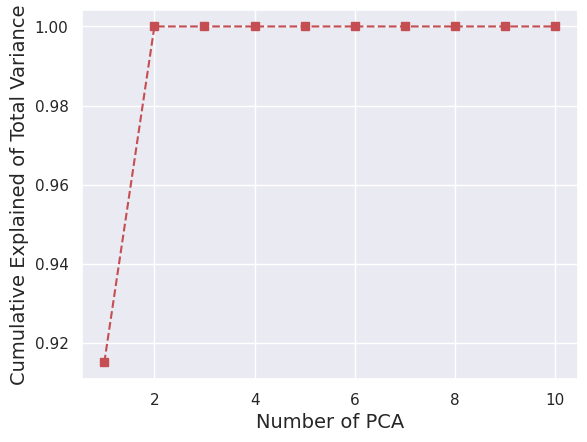

In [ ]:
from sklearn.decomposition import PCA
X, y = make_classification(n_samples=1000, n_features=10, n_redundant=8,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
pca = PCA().fit(X)
plt.plot(np.arange(1, X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('Number of PCA', fontsize='14'); plt.ylabel('Cumulative Explained of Total Variance', fontsize='14')

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'pca_1')

Text(0, 0.5, 'pca_2')

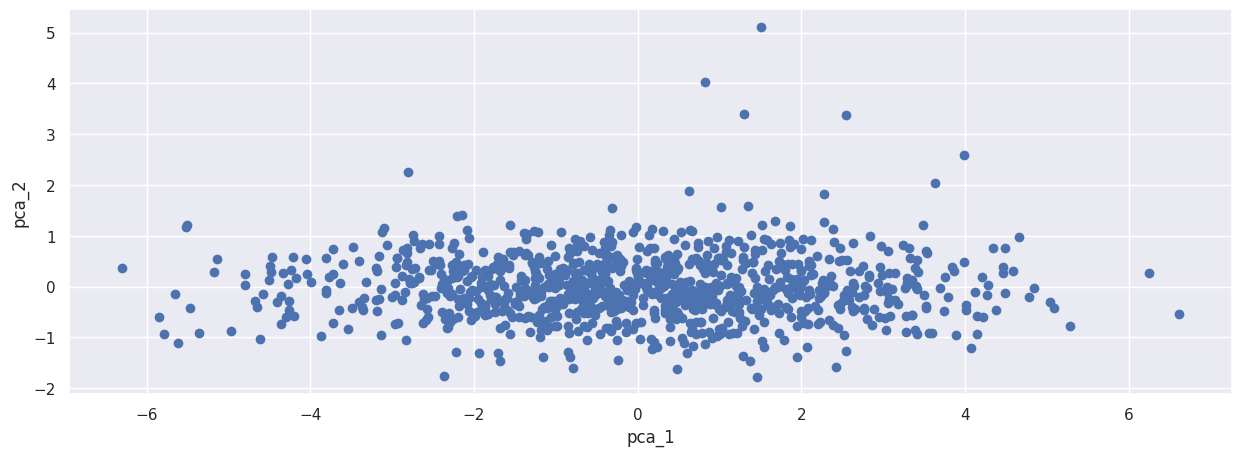

In [ ]:
X_pca = PCA(n_components=2).fit(X).transform(X)
X_pca = pd.DataFrame(X_pca, columns= ['pca_1', 'pca_2'])

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (15, 5))
ax = plt.scatter(X_pca['pca_1'], X_pca['pca_2'], cmap = 'coolwarm')
plt.xlabel('pca_1'); plt.ylabel('pca_2')

EllipticEnvelope(contamination=0.01, random_state=0)

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'pca_1')

Text(0, 0.5, 'pca_2')

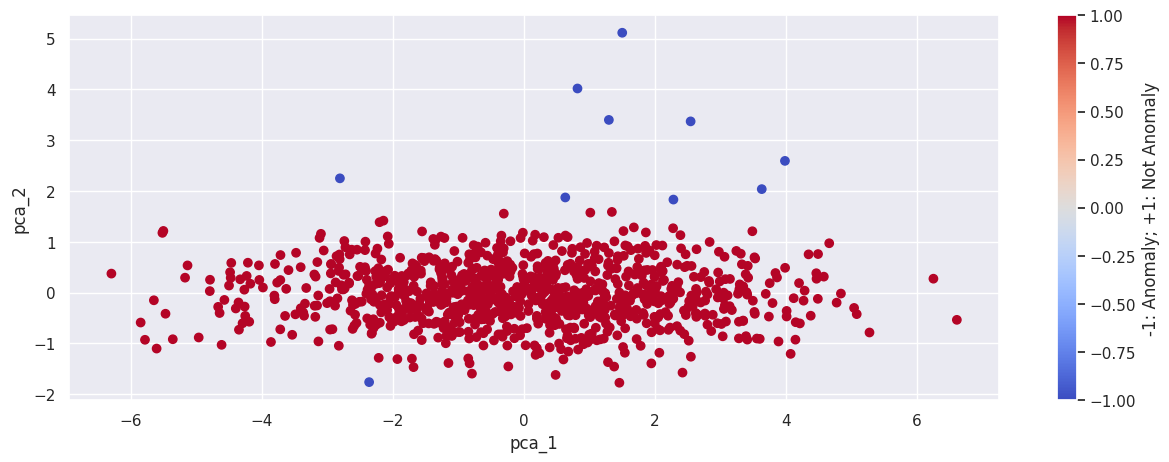

In [ ]:
X_pca = PCA(n_components=2).fit(X).transform(X)
X_pca = pd.DataFrame(X_pca, columns= ['pca_1', 'pca_2'])

el.fit(X_pca)
X_pca['Anomaly or Not'] = el.predict(X_pca)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (15, 5))
ax = plt.scatter(X_pca['pca_1'], X_pca['pca_2'], c = X_pca['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('pca_1'); plt.ylabel('pca_2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

### **실습 : boston 데이터로 PCA(2개 주성분)을 사용하여 이상치를 시각화해보자**

In [ ]:
boston = pd.read_csv('/content/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
boston.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
lstat      455
medv       229
dtype: int64

In [ ]:
for col in boston:
    boston[col] = (boston[col] -boston[col].mean())/boston[col].std()

Text(0.5, 0, 'Number of PCA')

Text(0, 0.5, 'Cumulative Explained of Total Variance')

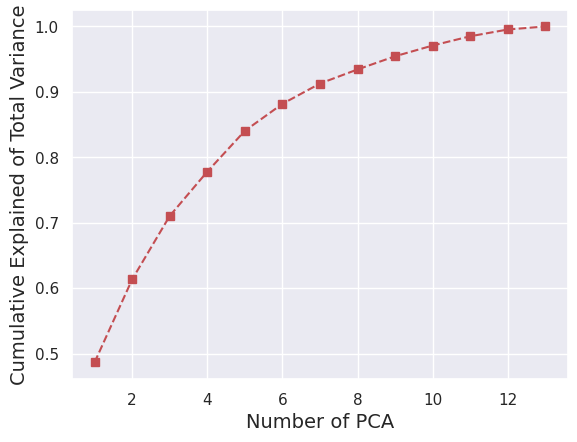

In [ ]:
pca = PCA().fit(boston)
plt.plot(np.arange(1, boston.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('Number of PCA', fontsize='14'); plt.ylabel('Cumulative Explained of Total Variance', fontsize='14')

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'pca_1')

Text(0, 0.5, 'pca_2')

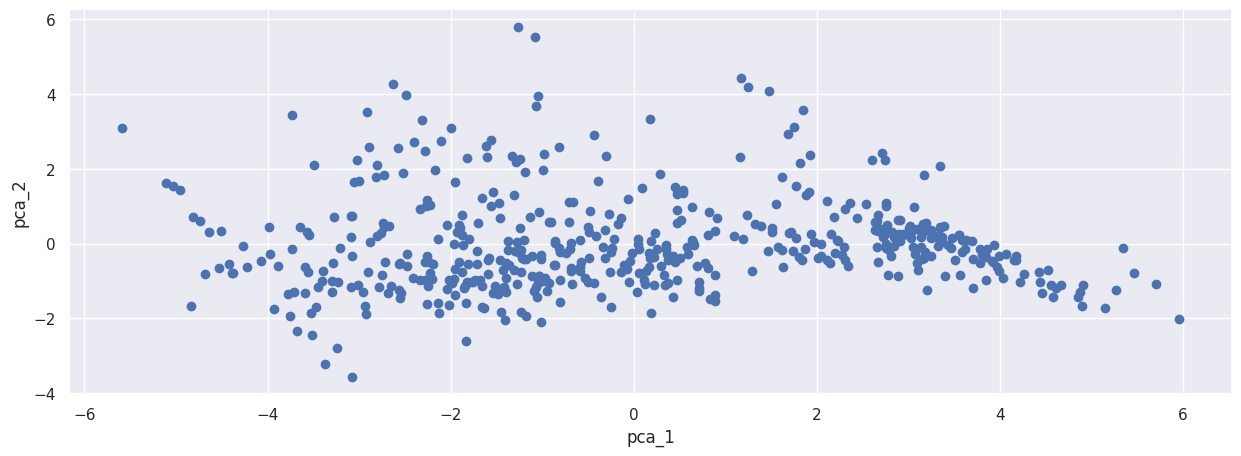

In [ ]:
X_pca = PCA(n_components=2).fit(boston).transform(boston)
X_pca = pd.DataFrame(X_pca, columns= ['pca_1', 'pca_2'])

# Create scatterplot and color the anomalies differently
plt.figure(figsize = (15, 5))
ax = plt.scatter(X_pca['pca_1'], X_pca['pca_2'], cmap = 'coolwarm')
plt.xlabel('pca_1'); plt.ylabel('pca_2')

In [ ]:
el.predict(X_pca)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1, -1, -1

<Figure size 1500x500 with 0 Axes>

Text(0.5, 0, 'pca_1')

Text(0, 0.5, 'pca_2')

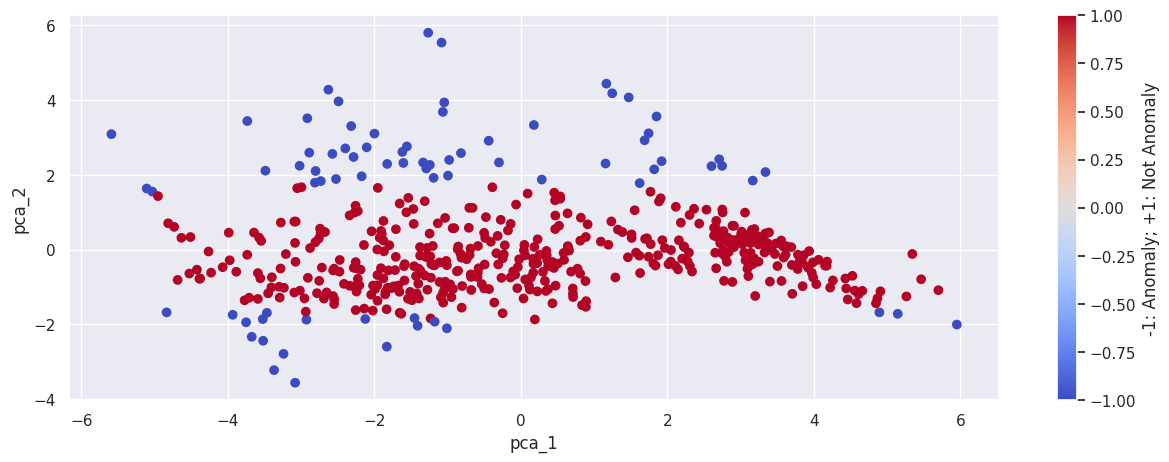

In [ ]:
X_pca = PCA(n_components=2).fit(boston).transform(boston)
X_pca = pd.DataFrame(X_pca, columns= ['pca_1', 'pca_2'])
X_pca['Anomaly or Not'] = el.predict(X_pca)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (15, 5))
ax = plt.scatter(X_pca['pca_1'], X_pca['pca_2'], c = X_pca['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('pca_1'); plt.ylabel('pca_2')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')

In [ ]:
X_pca[X_pca['Anomaly or Not'] == -1]

,pca_1,pca_2,Anomaly or Not
54,-1.830289,-2.594199,-1
56,-3.934678,-1.742622,-1
66,-2.927656,-1.873456,-1
68,-1.410058,-2.036217,-1
97,-2.524095,1.886522,-1
...,...,...,...
371,1.820717,2.146324,-1
372,1.852169,3.558901,-1
374,5.145764,-1.716401,-1
384,4.894970,-1.677413,-1


# **END**